## Artificial Recurrent Neural network - Long Short Term Memory (LSTM)

In [10]:
# Import libraries
import math
import pandas_datareader as web
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [33]:
# Define the date range
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Fetch S&P 500 data
sp500 = yf.Ticker('^GSPC')
sp500_data = sp500.history(period="1d", start=start_date, end=end_date)

# Remove the time zone information from the date index
sp500_data.index = sp500_data.index.date

# Remove the specified columns and reorder the remaining ones
df = sp500_data[['High', 'Low', 'Open', 'Close', 'Volume']]

# Display the DataFrame
df

,High,Low,Open,Close,Volume
2013-01-02,1462.430054,1426.189941,1426.189941,1462.420044,4202600000
2013-01-03,1465.469971,1455.530029,1462.420044,1459.369995,3829730000
2013-01-04,1467.939941,1458.989990,1459.369995,1466.469971,3424290000
2013-01-07,1466.469971,1456.619995,1466.469971,1461.890015,3304970000
2013-01-08,1461.890015,1451.640015,1461.890015,1457.150024,3601600000
...,...,...,...,...,...
2022-12-23,3845.800049,3797.010010,3815.110107,3844.820068,2819280000
2022-12-27,3846.649902,3813.219971,3843.340088,3829.250000,3030300000
2022-12-28,3848.320068,3780.780029,3829.560059,3783.219971,3083520000
2022-12-29,3858.189941,3805.449951,3805.449951,3849.280029,3003680000


In [34]:
# Get number of rows and columns in the data set
df.shape

(2518, 5)

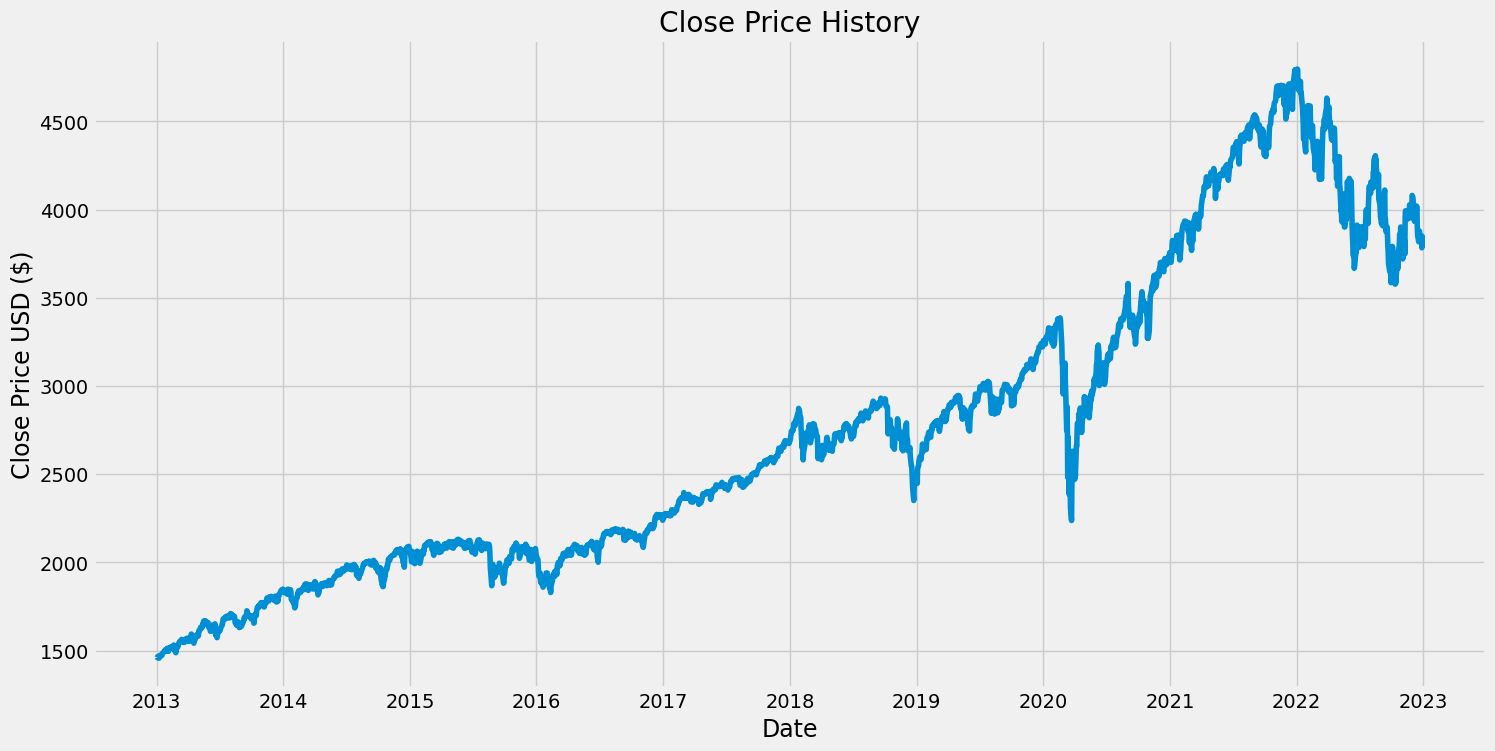

In [36]:
# Plot the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=17)
plt.ylabel('Close Price USD ($)', fontsize=17)
plt.show()

In [40]:
# Create new dataframe with close column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2015

In [42]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)    

scaled_data

array([[1.57812891e-03],
       [6.64779311e-04],
       [2.79089605e-03],
       ...,
       [6.96551164e-01],
       [7.16333119e-01],
       [7.13404449e-01]])

In [44]:
# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00157813, 0.00066478, 0.0027909 , 0.00141941, 0.        ,
       0.00115889, 0.00448282, 0.00446187, 0.00405162, 0.00454869,
       0.00463554, 0.00712399, 0.00863325, 0.01060368, 0.01127745,
       0.01128041, 0.01371797, 0.01288552, 0.01517931, 0.01341852,
       0.01226563, 0.01677542, 0.01154693, 0.01621245, 0.01646098,
       0.01564348, 0.01820083, 0.01792532, 0.01865001, 0.01891949,
       0.01923393, 0.01875781, 0.02209669, 0.01641006, 0.01355629,
       0.01750308, 0.00919323, 0.01191525, 0.01761987, 0.0172276 ,
       0.01828165, 0.02037783, 0.02474689, 0.02524696, 0.02608544,
       0.02815768, 0.0296669 , 0.02854695, 0.02915784, 0.03176608,
       0.03100845, 0.02843315, 0.0273072 , 0.03041254, 0.02654661,
       0.02986755, 0.02831037, 0.03192779, 0.03165228, 0.03355081])]
[0.0314486746031018]

[array([0.00157813, 0.00066478, 0.0027909 , 0.00141941, 0.        ,
       0.00115889, 0.00448282, 0.00446187, 0.00405162, 0.00454869,
       0.00463554, 0.00712399, 0.008

In [48]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [50]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1955, 60, 1)

In [53]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1955/1955 [==============================] - 16s 8ms/step - loss: 7.2150e-04


In [56]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [57]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [58]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [59]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 0s 5ms/step


In [61]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

257.39582184626613

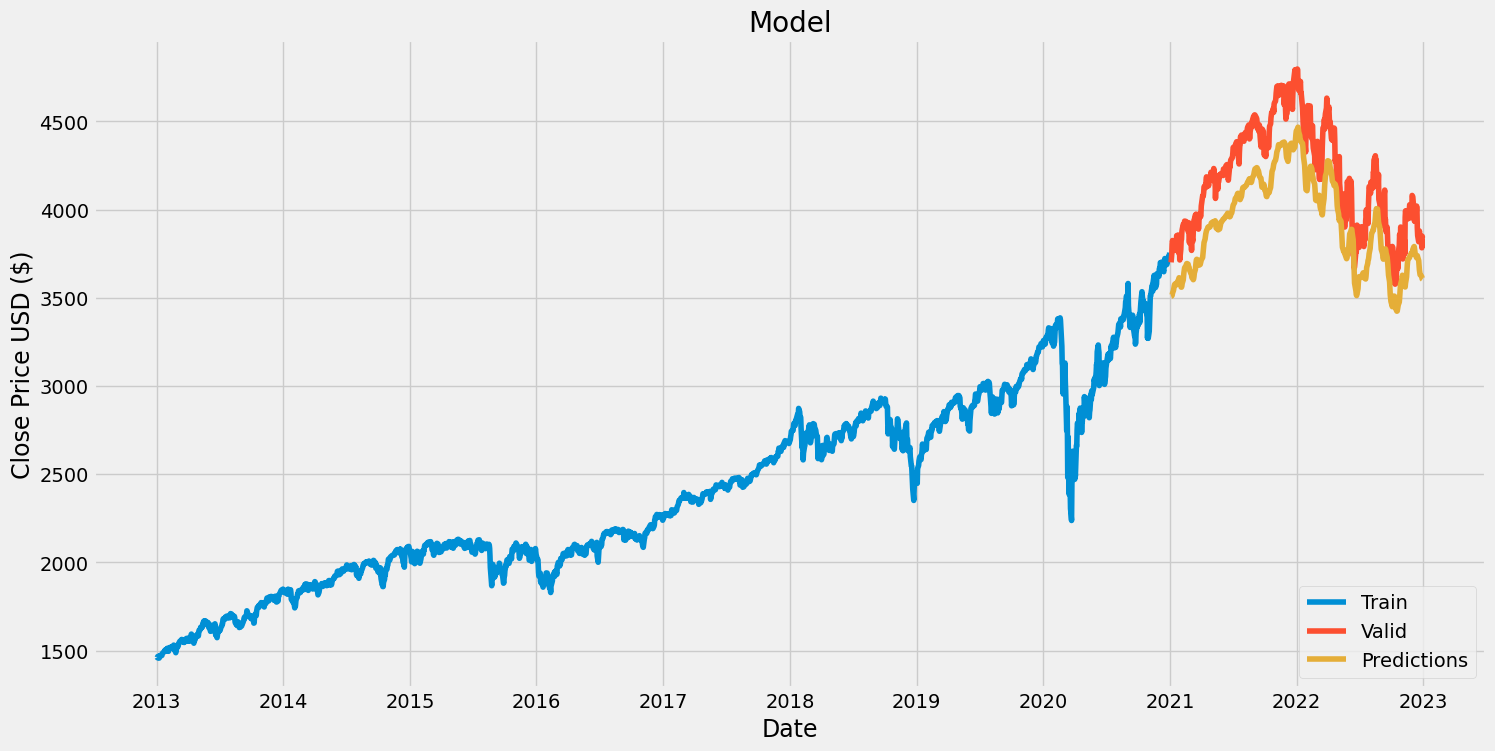

In [69]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.copy()  # Create a copy to avoid the SettingWithCopyWarning
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=17)
plt.ylabel('Close Price USD ($)', fontsize=17)

# Plot 'Close' from 'train' data
plt.plot(train['Close'], label='Train')

# Plot 'Close' from 'valid' data
plt.plot(valid['Close'], label='Valid')

# Plot 'Predictions' from 'valid' data
plt.plot(valid['Predictions'], label='Predictions')

plt.legend(loc='lower right')
plt.show()

In [67]:
# Show the valid and predicted prices
valid

,Close,Predictions
2021-01-04,3700.649902,3509.071045
2021-01-05,3726.860107,3509.807617
2021-01-06,3748.139893,3510.379150
2021-01-07,3803.790039,3513.561523
2021-01-08,3824.679932,3525.306396
...,...,...
2022-12-23,3844.820068,3630.445801
2022-12-27,3829.250000,3622.779053
2022-12-28,3783.219971,3616.990967
2022-12-29,3849.280029,3606.729004


In [ ]:
# Get the quote
